# Offline Mining of Evaluation Sets

## Training Evaluation

In [6]:
"""Import from parent directory."""
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path: sys.path.append(module_path)

In [7]:
import pickle
from dataset.imagenetvid.curate_imagenet import make_training_pickle, make_validation_pickle, \
    VAL_EVAL_SET_PKL, VAL_EVAL_STATS_PKL, EASY_VAL_EVAL_SET_PKL, EASY_VAL_EVAL_STATS_PKL, \
    TRAIN_EVAL_SET_PKL, TRAIN_EVAL_STATS_PKL

In [7]:
import random
from imageio import imread

def get_next_batch(pkl_file_path):
    def _pickle_generator(pkl_file):
        try:
            while True:
                yield pickle.load(pkl_file)
        except EOFError:
            pass

    with open(pkl_file_path, 'rb') as f:
        for image_paths, labels in _pickle_generator(f):
            print(image_paths, labels)
            images = [imread(img) for img in image_paths]
            yield (images, labels)
            
def plot_triplet_eval_batch(images, labels):
    for im in images:
        plt.imshow(im)
        plt.show()

In [3]:
# for _ in range(6):
#     make_training_eval_pickle()

In [6]:
def print_top(path):
    pkl_file = open(path, 'rb')
    print(pickle.load(pkl_file))
    pkl_file.close()

print_top(TRAIN_EVAL_SET_PKL)

(['data/ILSVRC2015-VID-Curation/Data/VID/train/b/ILSVRC2015_train_00169002/000027.02.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/b/ILSVRC2015_train_00169002/000030.02.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/b/ILSVRC2015_train_00169002/000030.03.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/b/ILSVRC2015_train_00169002/000030.04.crop.x.jpg'], [0, 0, 1, 1])


In [5]:
import numpy as np
import matplotlib.pyplot as plt

pkl_file = open(TRAIN_EVAL_STATS_PKL, 'rb')
stats = pickle.load(pkl_file)
pkl_file.close()

counts = {}
total = 0
i = 0
for k, v in stats.items():
    counts[i] = v
    total += v
    i += 1
    
assert len(counts) == 30, 'missing some class!'
print("Total of {0} objects".format(total))

labels, values = zip(*counts.items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

Total of 2026 objects


<Figure size 640x480 with 1 Axes>

In [5]:
def count_data_points(pkl_file_path):
    def _pickle_generator(pkl_file):
        try:
            while True:
                yield pickle.load(pkl_file)
        except EOFError:
            pass
    
    total = 0
    count = 0
    maxx, minn = float('-inf'), float('inf')
    with open(pkl_file_path, 'rb') as f:
        for image_paths, _ in _pickle_generator(f):
            total += len(image_paths)
            count += 1
            maxx = max(maxx, len(image_paths))
            minn = min(minn, len(image_paths))
    return total, total/count, maxx, minn

count_data_points(TRAIN_EVAL_SET_PKL)

(10233, 5.469267771245323, 20, 4)

['data/ILSVRC2015-VID-Curation/Data/VID/train/b/ILSVRC2015_train_00169002/000027.02.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/b/ILSVRC2015_train_00169002/000030.02.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/b/ILSVRC2015_train_00169002/000030.03.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/b/ILSVRC2015_train_00169002/000030.04.crop.x.jpg'] [0, 0, 1, 1]


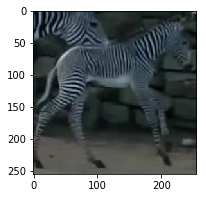

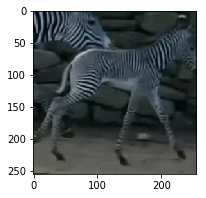

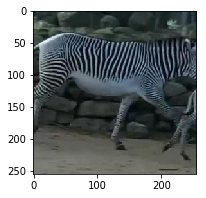

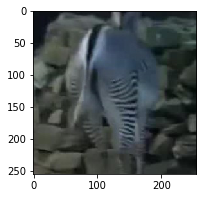

['data/ILSVRC2015-VID-Curation/Data/VID/train/b/ILSVRC2015_train_00284016/000176.02.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/b/ILSVRC2015_train_00284016/000129.00.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/b/ILSVRC2015_train_00284016/000129.01.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/b/ILSVRC2015_train_00284016/000129.02.crop.x.jpg'] [0, 1, 1, 0]


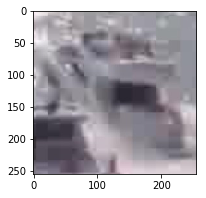

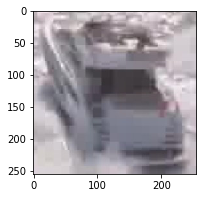

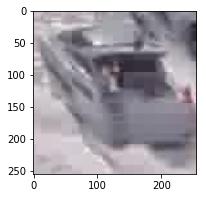

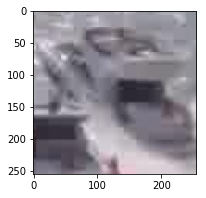

In [7]:
plt.rcParams["figure.figsize"] = [4,3]
stop_at = 2
for x, y in get_next_batch(TRAIN_EVAL_SET_PKL):
    stop_at -= 1
    plot_triplet_eval_batch(x, y)
    if stop_at < 1: break

## Validation

In [8]:
# for i in range(30):
#     make_validation_pickle()

In [9]:
print_top(VAL_EVAL_SET_PKL)

(['data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00007024/000003.00.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00007024/000025.00.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00007024/000025.01.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00007024/000025.02.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00007024/000025.03.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00007024/000025.04.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00007024/000025.05.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00007024/000025.06.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00007024/000025.07.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00007024/000025.08.crop.x.jpg'], [0, 0, 1, 1, 1, 1, 1, 1, 1, 1])


Total of 316 objects


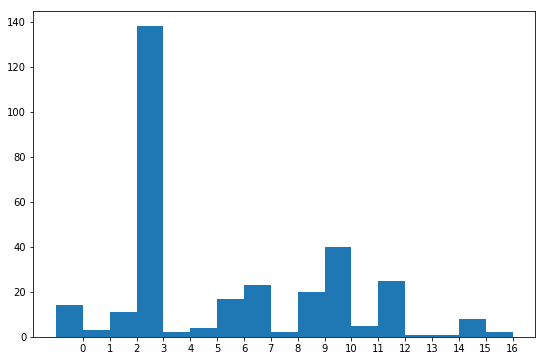

In [10]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [9,6]

pkl_file = open(VAL_EVAL_STATS_PKL, 'rb')
stats = pickle.load(pkl_file)
pkl_file.close()

counts = {}
total = 0
i = 0
for k, v in stats.items():
    counts[i] = v
    total += v
    i += 1
    
if len(counts) == 30:
    print('missing some class!')
print("Total of {0} objects".format(total))

labels, values = zip(*counts.items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

['data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00007024/000003.00.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00007024/000025.00.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00007024/000025.01.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00007024/000025.02.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00007024/000025.03.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00007024/000025.04.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00007024/000025.05.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00007024/000025.06.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00007024/000025.07.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00007024/000025.08.crop.x.jpg'] [0, 0, 1, 1, 1, 1, 1, 1, 1, 1]


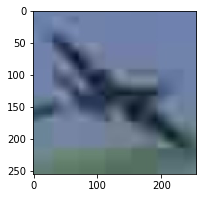

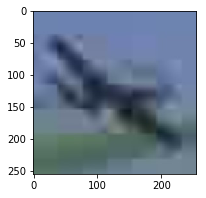

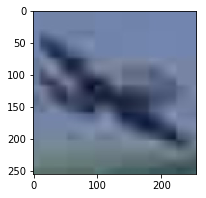

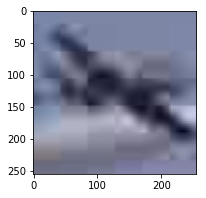

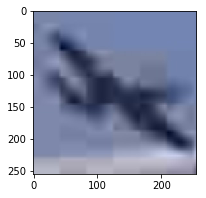

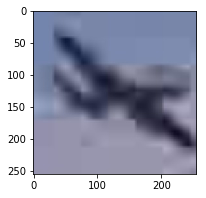

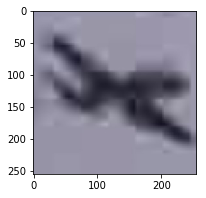

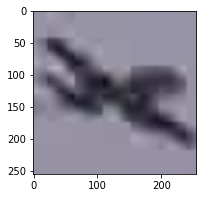

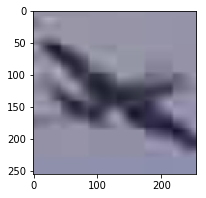

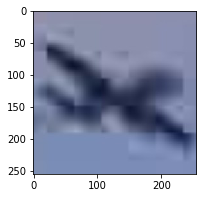

['data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00052000/000273.00.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00052000/000383.00.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00052000/000383.01.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00052000/000383.02.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00052000/000383.03.crop.x.jpg'] [0, 0, 1, 1, 1]


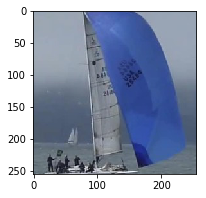

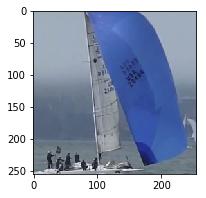

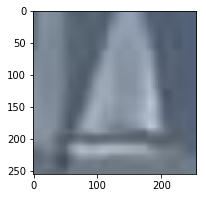

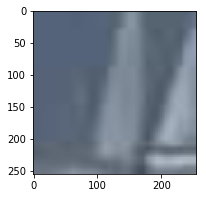

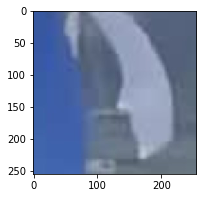

['data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00007016/000151.00.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00007016/000164.00.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00007016/000164.01.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00007016/000164.02.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00007016/000164.03.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00007016/000164.04.crop.x.jpg'] [0, 0, 1, 1, 1, 1]


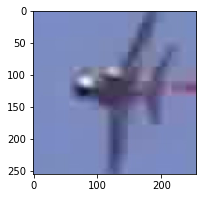

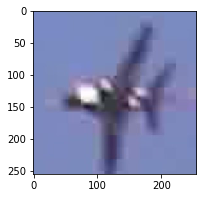

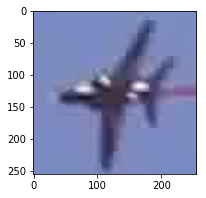

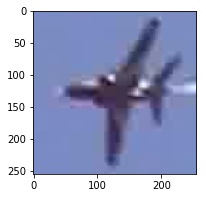

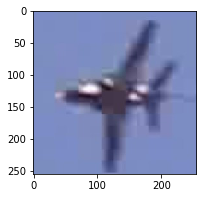

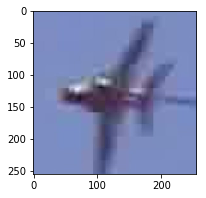

['data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00023013/000025.00.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00023013/000008.00.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00023013/000008.01.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00023013/000008.02.crop.x.jpg'] [0, 0, 1, 1]


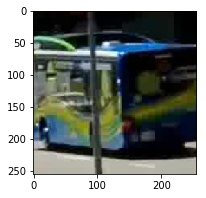

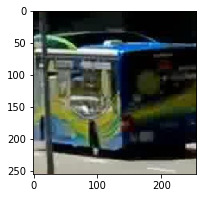

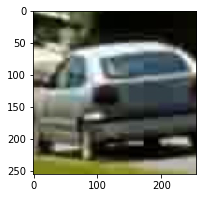

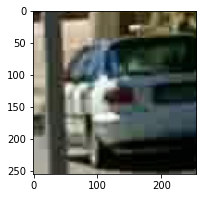

In [32]:
plt.rcParams["figure.figsize"] = [4,3]
stop_at = 4
for x, y in get_next_batch(VAL_EVAL_SET_PKL):
    stop_at -= 1
    plot_triplet_eval_batch(x, y)
    if stop_at < 1: break

In [12]:
count_data_points(VAL_EVAL_SET_PKL)

(9179, 6.148024112525118, 12, 4)

## Easy, Medium, and Hard Validation Sets

In [49]:
from imageio import imread
import matplotlib.pyplot as plt

from dataset.imagenetvid.curate_imagenet import \
_get_snippets_dict, _get_random_frame_annotation, \
_get_cropped_framepath, _get_original_framepath, \
_get_object, _make_return_random_crops

In [50]:
snippets_dict = _get_snippets_dict(False)

Loading validation pickle...


In [71]:
snippets = [a[0] for a in snippets_dict['multiple_bboxes'][15:29]]

In [105]:
random_frame = _get_random_frame_annotation(snippets[3])

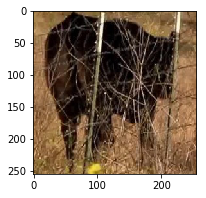

In [114]:
cropped_framepath = _get_cropped_framepath(random_frame, '0', False)
plt.imshow(imread(cropped_framepath))
plt.show()

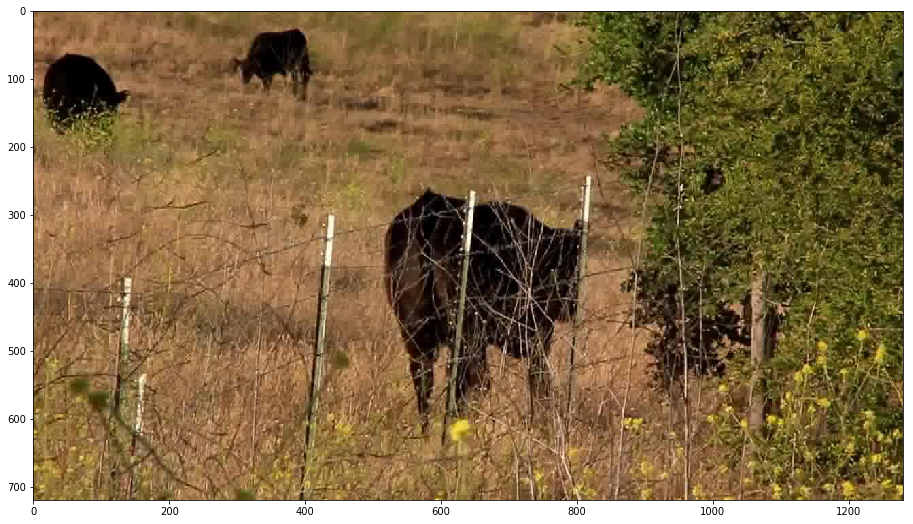

In [115]:
original_framepath = _get_original_framepath(random_frame, False)
plt.rcParams["figure.figsize"] = [16,9]
plt.imshow(imread(original_framepath)) 
plt.show()

In [83]:
obj = _get_object(random_frame, '0')
# obj = obj['bndbox']
# black_area = [obj['xmin'], obj['xmax'], obj['ymin'], obj['ymax']]
# black_area = [int(x) for x in black_area]
# black_area

In [84]:
random_crops = _make_return_random_crops(random_frame, 6, False, size=(299, 299),
    black_area=obj, iou_limit=0.05)

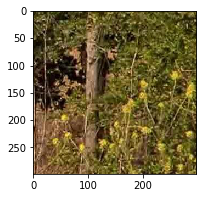

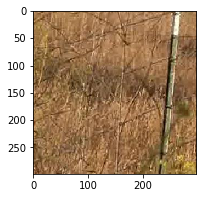

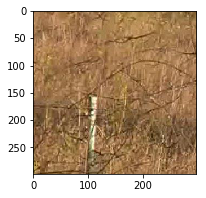

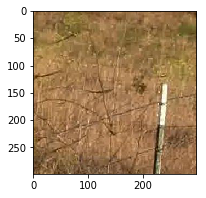

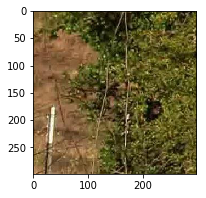

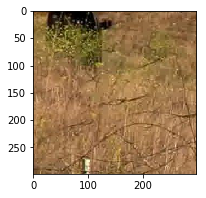

In [85]:
for path in random_crops:
    plt.imshow(imread(path)) 
    plt.show()

In [43]:
count_data_points(EASY_VAL_EVAL_SET_PKL)

(9454, 6.982274741506647, 7, 3)

In [16]:
print_top(EASY_VAL_EVAL_SET_PKL)
a = (['data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00007024/000006.06.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00007024/000005.06.crop.x.jpg', 'data/ILSVRC2015-VID-Random/Data/VID/e/ILSVRC2015_val_00007024.000005.0.JPEG', 'data/ILSVRC2015-VID-Random/Data/VID/e/ILSVRC2015_val_00007024.000005.1.JPEG', 'data/ILSVRC2015-VID-Random/Data/VID/e/ILSVRC2015_val_00007024.000005.2.JPEG', 'data/ILSVRC2015-VID-Random/Data/VID/e/ILSVRC2015_val_00007024.000005.3.JPEG', 'data/ILSVRC2015-VID-Random/Data/VID/e/ILSVRC2015_val_00007024.000005.4.JPEG'], [0, 0, 1, 1, 1, 1, 1])
print(len(a))
print(len(a[0]))
print(len(a[1]))

(['data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00007024/000006.06.crop.x.jpg', 'data/ILSVRC2015-VID-Curation/Data/VID/train/e/ILSVRC2015_val_00007024/000005.06.crop.x.jpg', 'data/ILSVRC2015-VID-Random/Data/VID/e/ILSVRC2015_val_00007024.000005.0.JPEG', 'data/ILSVRC2015-VID-Random/Data/VID/e/ILSVRC2015_val_00007024.000005.1.JPEG', 'data/ILSVRC2015-VID-Random/Data/VID/e/ILSVRC2015_val_00007024.000005.2.JPEG', 'data/ILSVRC2015-VID-Random/Data/VID/e/ILSVRC2015_val_00007024.000005.3.JPEG', 'data/ILSVRC2015-VID-Random/Data/VID/e/ILSVRC2015_val_00007024.000005.4.JPEG'], [0, 0, 1, 1, 1, 1, 1])
2
7
7


1354
missing some class!
Total of 1354 objects


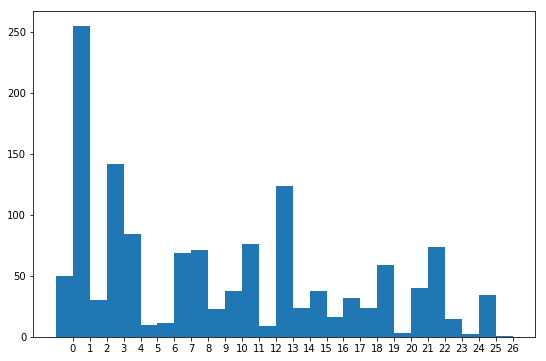

In [13]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [9,6]

pkl_file = open(EASY_VAL_EVAL_STATS_PKL, 'rb')
stats = pickle.load(pkl_file)
pkl_file.close()

counts = {}
total = 0
i = 0
for k, v in stats.items():
    counts[i] = v
    total += v
    i += 1
    
if len(counts) < 30:
    print('missing some class!')
print("Total of {0} objects".format(total))

labels, values = zip(*counts.items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [30]:
from dataset.imagenetvid.imagenet_dataset import get_next_easy_val_eval_batch, get_next_val_eval_batch

for batch in get_next_easy_val_eval_batch():
    im, l = batch
    for i in im:
        print(i.shape)
    break
    
print()

for batch in get_next_val_eval_batch():
    im, l = batch
    for i in im:
        print(i.shape)
    break    

(255, 255, 3)
(255, 255, 3)
(255, 255, 3)
(255, 255, 3)
(255, 255, 3)
(255, 255, 3)
(255, 255, 3)

(255, 255, 3)
(255, 255, 3)
(255, 255, 3)
(255, 255, 3)
(255, 255, 3)
(255, 255, 3)
(255, 255, 3)
(255, 255, 3)
(255, 255, 3)
(255, 255, 3)
